# Chi-Square Test with Website Statistics Data

   A/B testing is an experiment on two variants of a product to see which performs better based on a given metric. Typically, two consumer groups are exposed to two different versions of the same thing to see if there is a significant difference in metrics like sessions, click-through rate, and/or conversions.

   What do click-through rates and conversions have in common? They have a Bernoulli Distribution, the discrete probability distribution that has a probability of being 1 and a probability of being 0. For click-through rates, a user will either click (1) or not click (0). Similarly, for conversions, a user will either convert (1) or not convert (0). For such categorical variables, the chi-squared test can determine whether or not there is a significant association between two categorical variables (in this case, the website variant and whether or not a user clicks/converts).
In this project, we will use a dataset of an A/B test done on two versions of a website.


Variables:
<br>
**user_id** - unique ID
<br>
**timestamp** - time of customer conversion
<br>
**group** - treatment or control group
<br>
**landing_page** - landed on new or old webpage
<br>
**converted** - converted or not


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare

In [2]:
df = pd.read_csv("ab_data.csv")

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


## Cleaning the Data

Selecting rows where only the desired conditions exist

In [4]:
df_1 = df.loc[(df.group == 'control') & (df.landing_page == 'old_page')]
df_2 = df.loc[(df.group == 'treatment') & (df.landing_page == 'new_page')]

In [5]:
df_1.count()

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

In [6]:
df_2.count()

user_id         145311
timestamp       145311
group           145311
landing_page    145311
converted       145311
dtype: int64

In [7]:
# Concatinating the two groups into a clean dataframe, with no rows containing undesirable conditions
df_clean = pd.concat([df_1, df_2])

In [8]:
df_clean.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [9]:
# Removing irrelevent columns
df_clean.drop('user_id', axis=1, inplace=True)
df_clean.drop('timestamp', axis=1, inplace=True)

In [10]:
df_clean.head()

,group,landing_page,converted
0,control,old_page,0
1,control,old_page,0
4,control,old_page,1
5,control,old_page,0
7,control,old_page,0


In [11]:
df_clean.count()

group           290585
landing_page    290585
converted       290585
dtype: int64

## Creating a Contingency Table

**Null hypothesis**: H$_{0}$ : u$_{1}$ = u$_{2}$
<br>
**Alternative hypothesis**:  H$_{1}$ : u$_{1}$ > u$_{2}$
<br>
<br>
Where u$_{1}$ is the mean number of users converted from visiting the new page, and u$_{2}$ is the mean number of users converted from visiting the old page

In [13]:
chisqt = pd.crosstab(df_clean.landing_page, df_clean.converted, margins=True)
print(chisqt)

converted          0      1     All
landing_page                       
new_page      128047  17264  145311
old_page      127785  17489  145274
All           255832  34753  290585


In [14]:
# Creating a Numpy array based on the contigency tables values, for simpler chi-square test computing
value = np.array([chisqt.iloc[0][0:3].values, chisqt.iloc[1][0:3].values, chisqt.iloc[2][0:3].values])

## Run a Chi-Square Test

In [15]:
from scipy.stats import chi2_contingency

In [16]:
res = chi2_contingency(value)
print(res)

(1.7203143230181923, 0.787024278259039, 4, array([[127932.2874615,  17378.7125385, 145311.       ],
       [127899.7125385,  17374.2874615, 145274.       ],
       [255832.       ,  34753.       , 290585.       ]]))


We obtain a statistical (chi-square) value of **1.72**, and a p-value of **0.78** with **4** degrees of freedom.

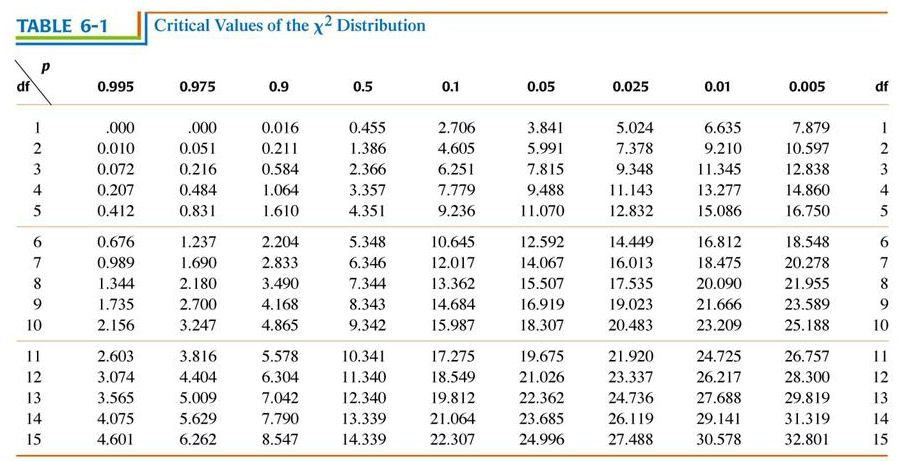

Given a probability of 0.5 with 4 degrees of freedom, our statistical value of **1.72** is less than the critical value of **3.357**, meaning we can safely reject the null hypothesis in favor of the alternative.